# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1188]:
import math
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [1189]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [1190]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return (np.linalg.norm(np.matmul(X, w) - y) ** 2) / X.shape[0]


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return np.matmul(X.T, (np.matmul(X, w) - y)) * 2 / X.shape[0]


Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [1191]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [1192]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    wt = [w_init]
    for i in range(n_iterations):
        wt.append(wt[i-1] - lr * loss.calc_grad(X, y, wt[i-1]))
    return wt

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [1193]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [1194]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045025
0.8670651661360436


Для красивого вывода графиков в последующих заданиях я закомментировал две строки функции `plot_gd`

In [1195]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    # plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    # plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

In [1196]:
import matplotlib.gridspec as gridspec
import itertools

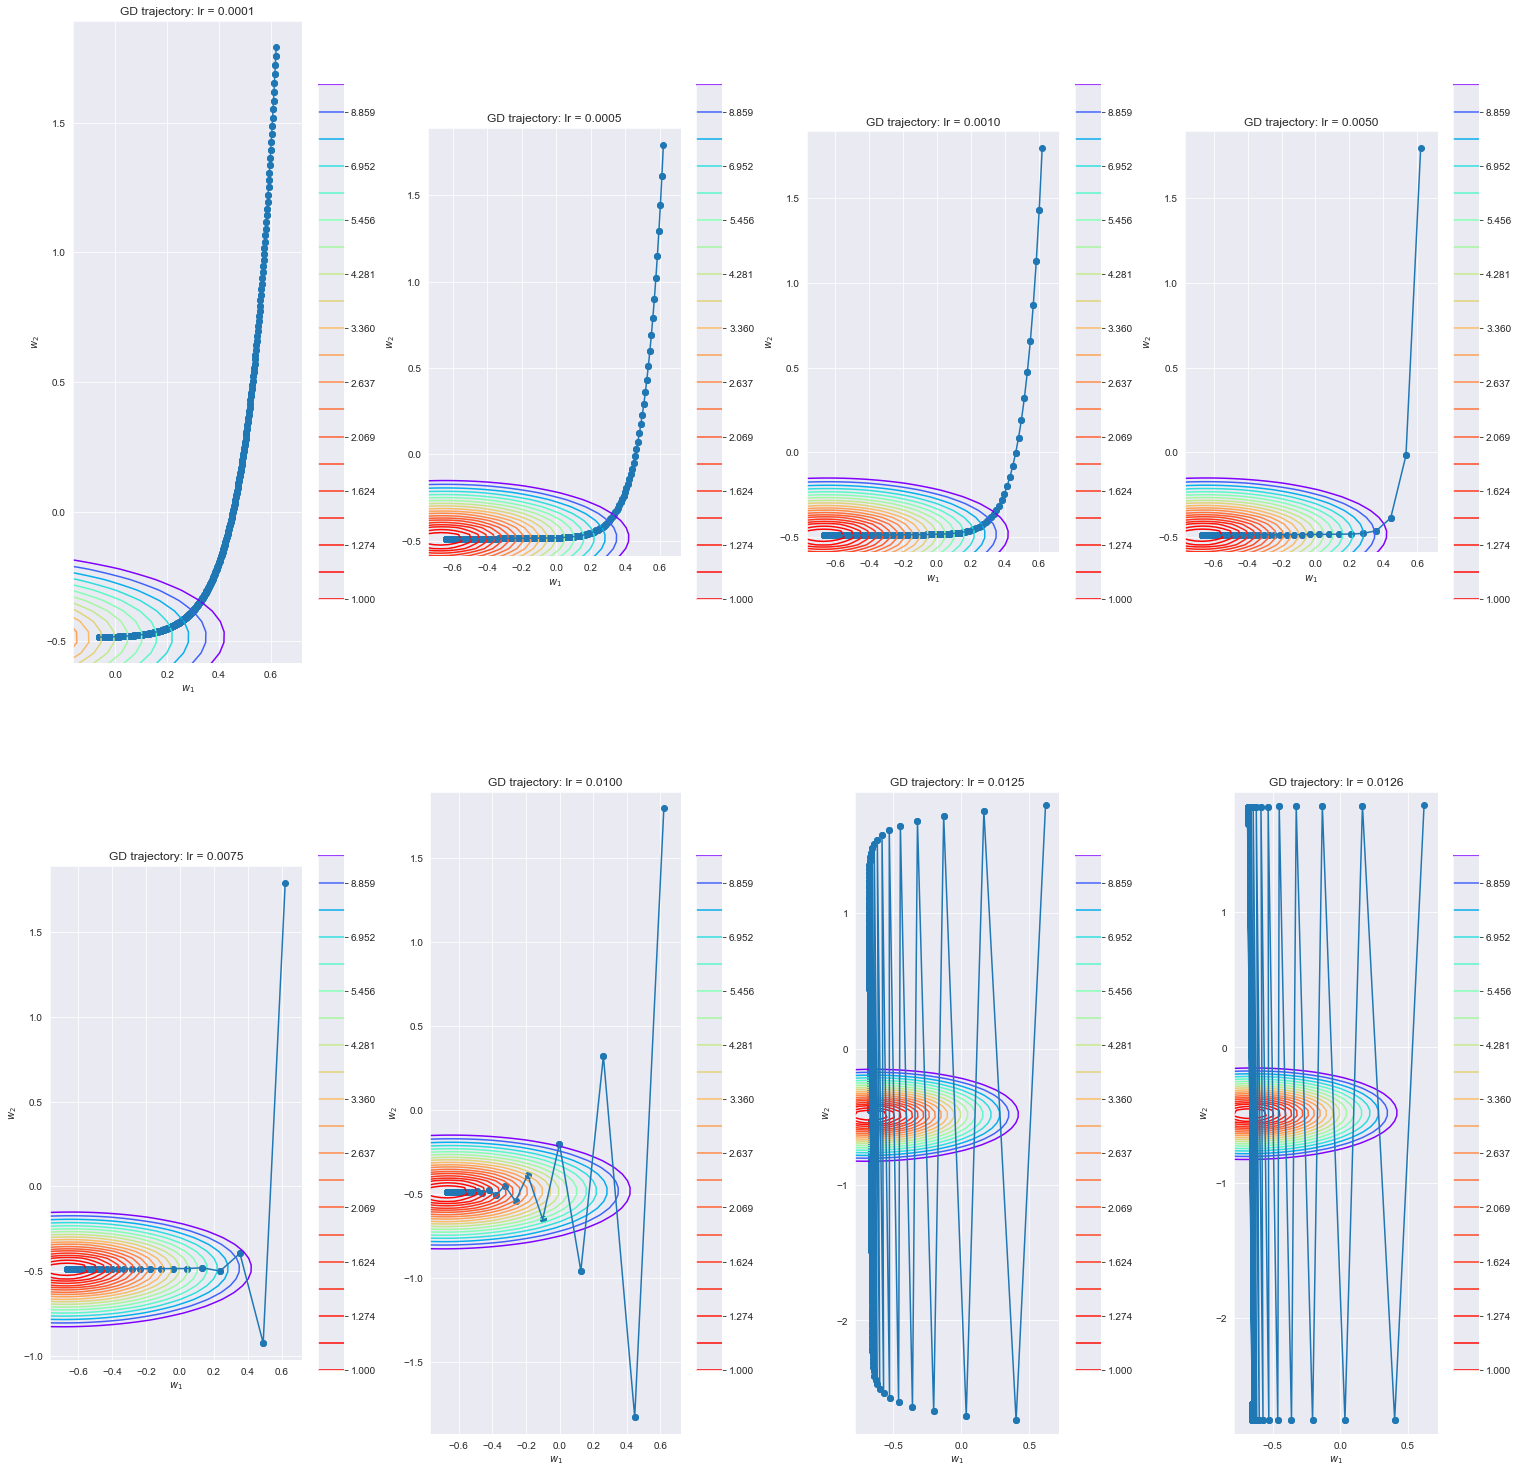

In [1197]:
# -- YOUR CODE HERE --
loss = MSELoss()
fig = plt.figure(figsize=(26, 26))
gs = gridspec.GridSpec(2, 4)
lrs = [0.0001, 0.0005, 0.001, 0.005, 0.0075, 0.01, 0.0125, 0.01255]

for grid, lr in zip(itertools.product([0, 1],[0, 1, 2, 3]), lrs):
    ax = plt.subplot(gs[grid[0], grid[1]])
    w_list = gradient_descent(w_init, X, y, loss, lr, 1000)
    plot_gd(w_list, X, y, loss)
    plt.title(f"GD trajectory: lr = {lr:.4f}")

plt.show()

#### Выводы
* При маленьком шаге (0.0001 <= lr <= 0.001) траектория спуска более гладкая (без скачков), спуску требуется сделать больше шагов, чтобы достичь минимума (это долго, и, например, при количестве шагов равном 100, градиентный спуск на наших данных при таких значениях lr не успеет сойтись);
* При увеличении шага траектория спуска начинает "скакать", но при lr = 0.075 и lr = 0.01 градиентный спуск все ещё сходится, причем быстрее, чем при более маленьких значениях;
* При дальнейшем увеличении (lr >= 0.125) градиентный спуск перестает сходиться, так как "перепрыгивает" через минимальное значение ошибки;
* Оптимальный размер шага в данном случае примерно 0.01.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [1198]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    wt = [w_init]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        y_batch = y[batch_indices]
        wt.append(wt[i-1] - lr * loss.calc_grad(batch, y_batch, wt[i-1]))
    return wt

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

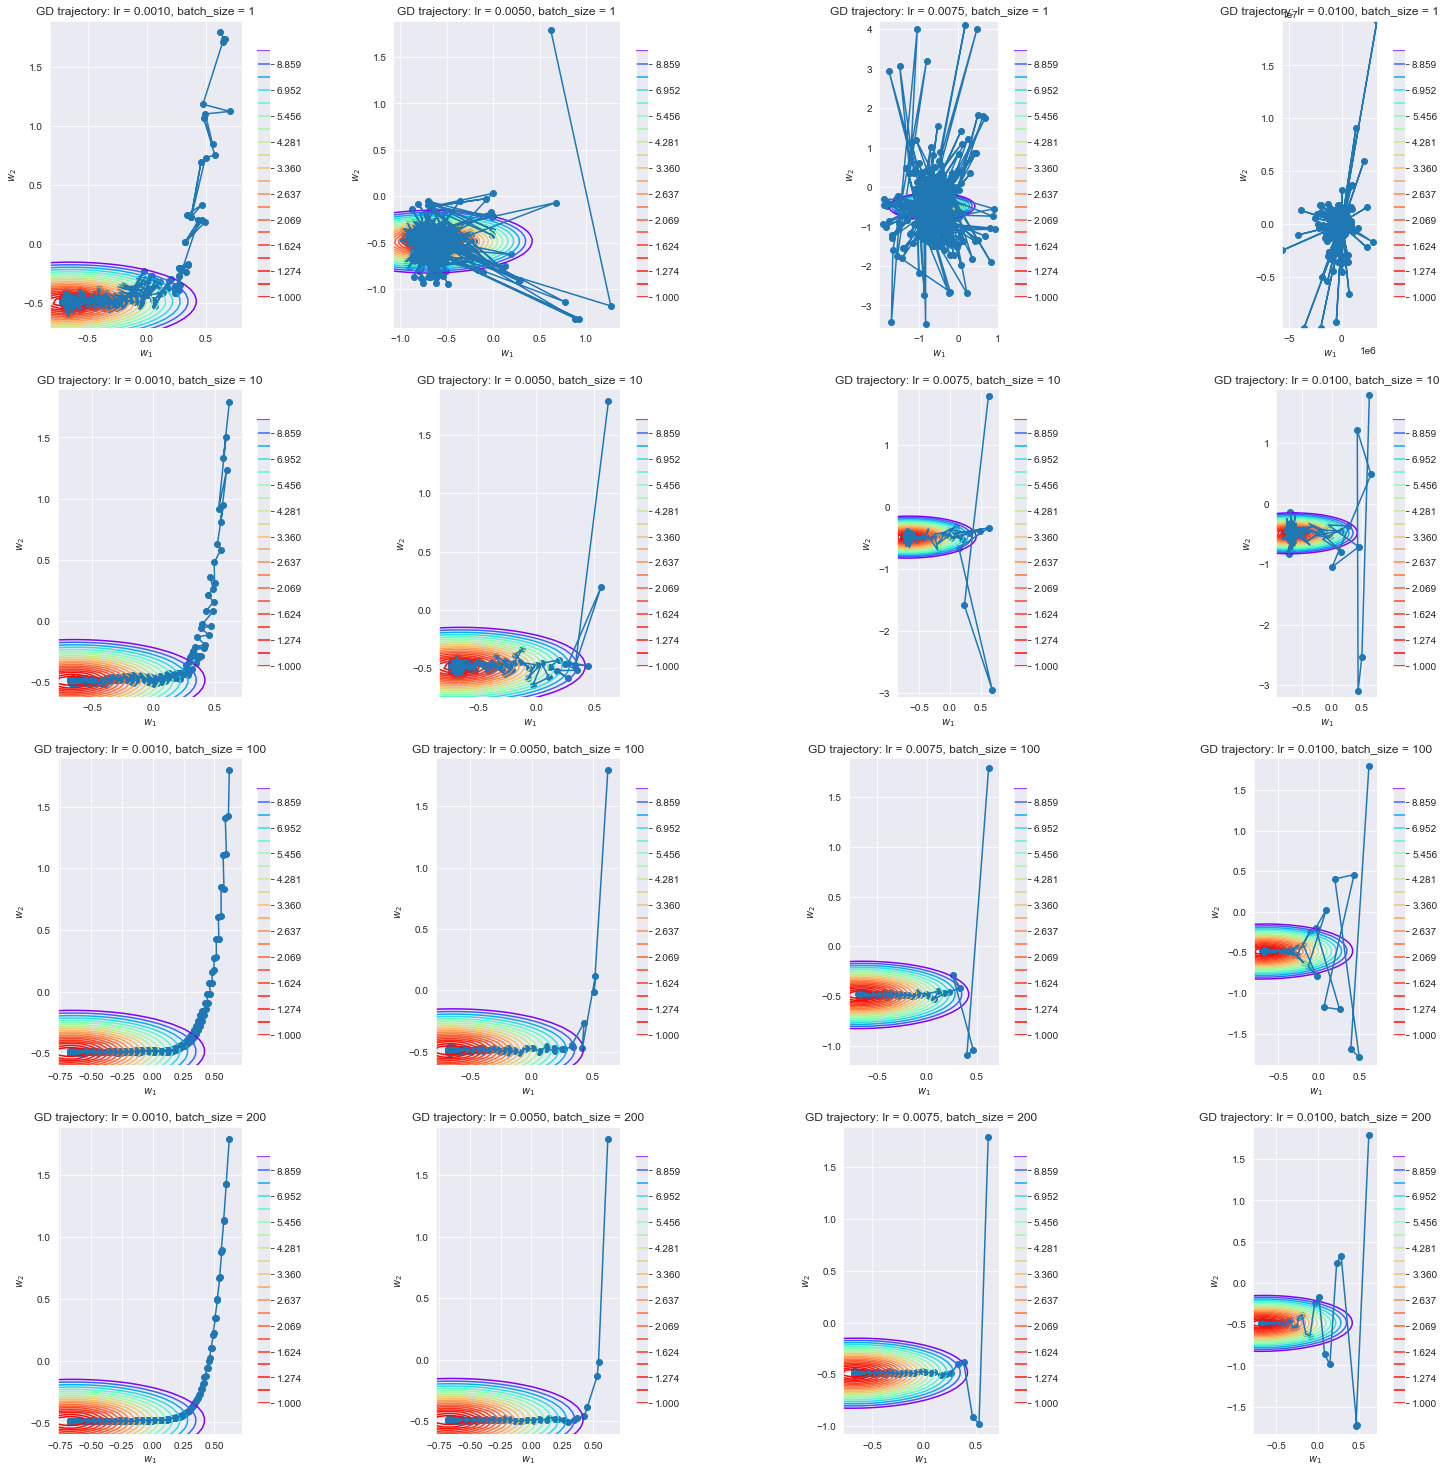

In [1199]:
# -- YOUR CODE HERE --
loss = MSELoss()
fig = plt.figure(figsize=(26, 26))
gs = gridspec.GridSpec(4, 4)
lrs = [0.001, 0.005, 0.0075, 0.01]
batch_sizes = [1]* 4 + [10]* 4 + [100]* 4 + [200]* 4

for grid, lr, batch_size in zip(itertools.product([0, 1, 2, 3],  repeat=2), lrs * 4, batch_sizes):
    ax = plt.subplot(gs[grid[0], grid[1]])
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 1000)
    plot_gd(w_list, X, y, loss)
    plt.title(f"GD trajectory: lr = {lr:.4f}, batch_size = {batch_size}")

plt.show()

#### Выводы
* Стохастический градиентный спуск отличается от обычного тем, что он при вычислении градиента ориентируется только на часть объектов выборки, поэтому SGD на некоторых итерациях делает шаги, отдаляющие его от минимума, тогда как обычный градиентный спуск на каждом шаге приближается к минимуму (при не слишком большом размере шага);
* При маленьких batch_size траектория спуска более хаотична (много скачков), так как градиент считается по малой части объектов, при этом многие шаги делаются не в сторону минимума;
* С увеличением batch_size траектория спуска становится более направленной (более гладкой) и более похожей на обычный градиентный спуск (при batch_size = 300 оба метода эквивалентны), при этом реже делаются шаги, которые уводят спуск в сторону, противоположную уменьшению ошибки на всей выборке;
* При маленьких размерах шага при любом значении batch_size спуски достигают окрестности нуля, но при маленьких размерах batch градиентный спуск сходится не до конца, не достигая минимума, а только колеблясь около него;
* При увеличении размера шага на малых batch_size спуск быстро начинает расходиться, при больших batch_size сначала быстрее сходится (за меньшее количество шагов), а при дальнейшем увеличении также перестает сходиться.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [1200]:
def stochastic_gradient_descent_fading(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    wt = [w_init]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        y_batch = y[batch_indices]
        lrt = lr * (1 / (1 + i)) ** p
        wt.append(wt[i-1] - lrt * loss.calc_grad(batch, y_batch, wt[i-1]))
    return wt

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

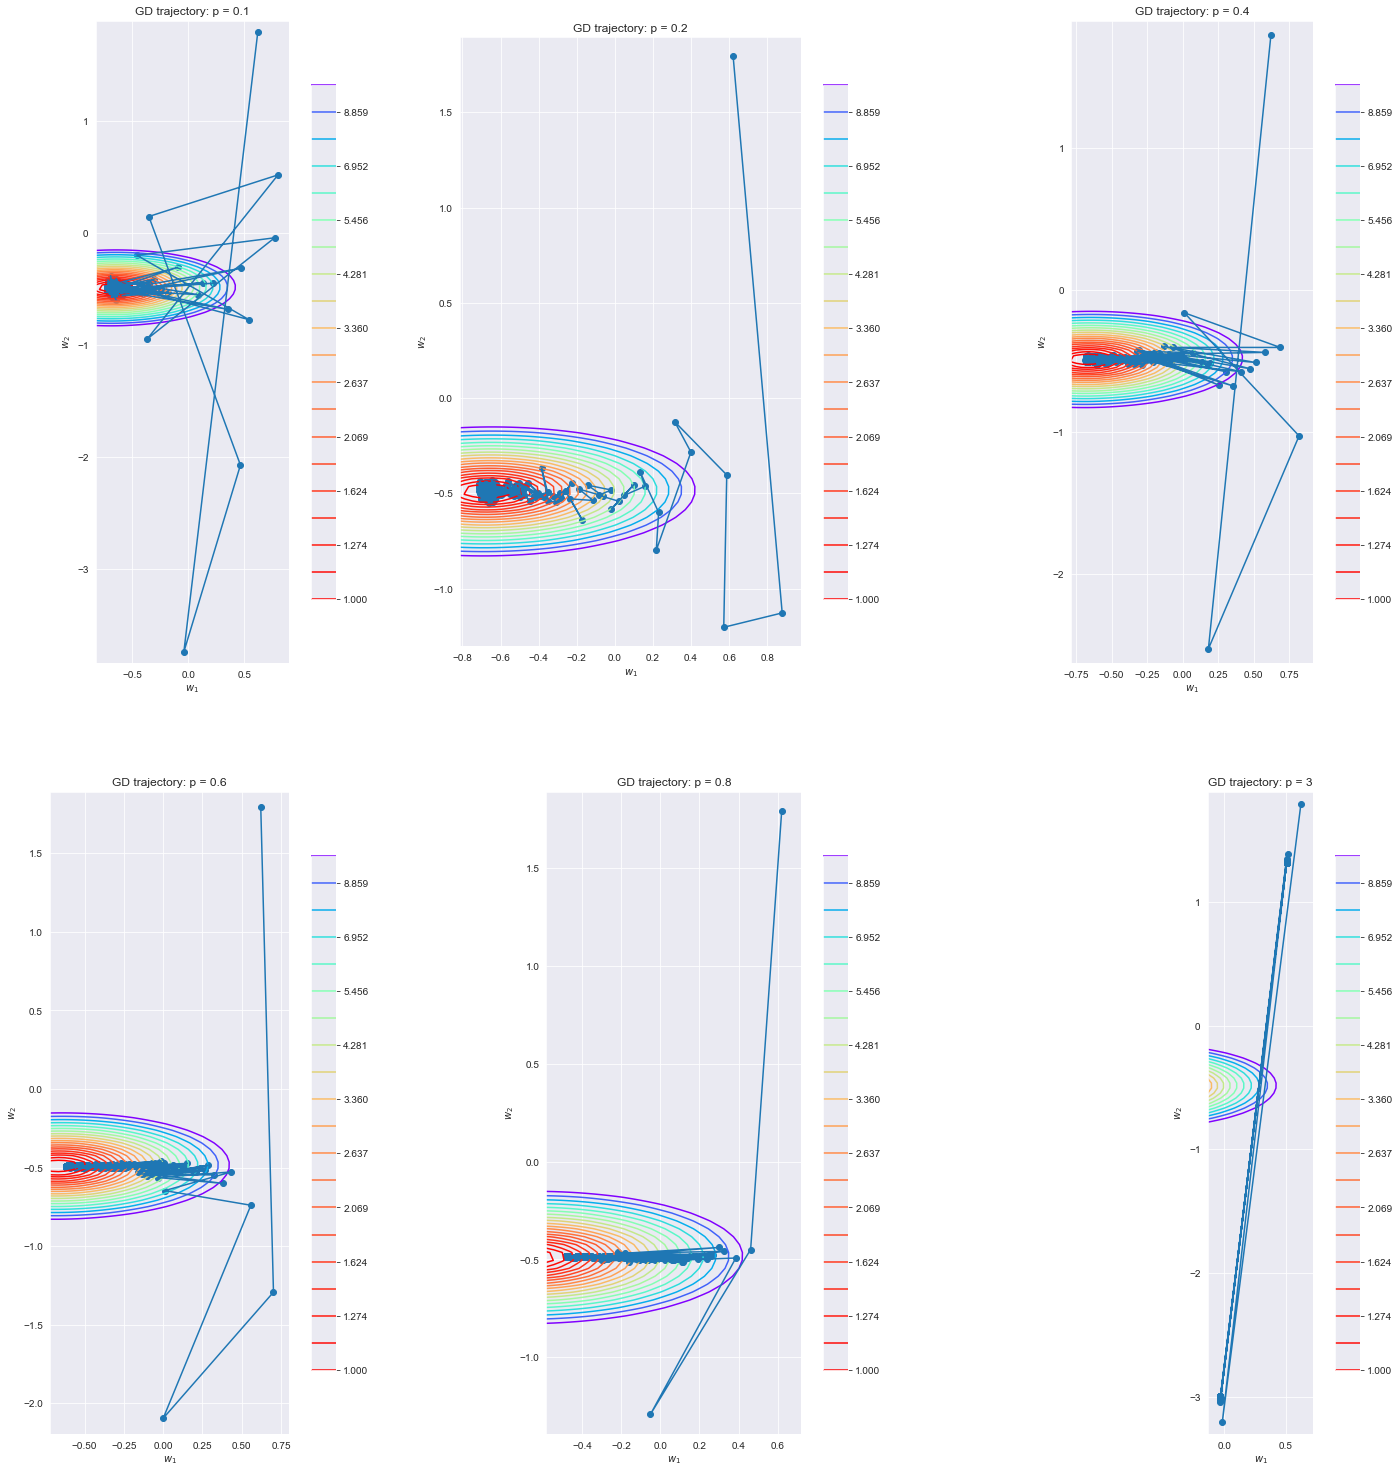

In [1201]:
# -- YOUR CODE HERE --
loss = MSELoss()
fig = plt.figure(figsize=(26, 26))
gs = gridspec.GridSpec(2, 3)
lr = 0.01
batch_size = 10
ps = [0.1, 0.2, 0.4, 0.6, 0.8, 3]

for grid, p in zip(itertools.product([0, 1],[0, 1, 2]), ps):
    ax = plt.subplot(gs[grid[0], grid[1]])
    w_list = stochastic_gradient_descent_fading(w_init, X, y, loss, lr, batch_size, p, 1000)
    plot_gd(w_list, X, y, loss)
    plt.title(f"GD trajectory: p = {p}")

plt.show()

#### Выводы
* Чем больше p, тем быстрее уменьшается длина шага, и, следовательно, тем больше шагов требуется градиентному спуску, чтобы достичь минимума (при слишком больших значениях p спуск никогда не достигнет минимума);
* Чем меньше p, тем более хаотична траектория спуска, но при этом меньшее количество шагов требуется спуску, чтобы достичь окрестности минимума (но траектория долго будет колебаться вблизи минимума, перескакивая его);

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

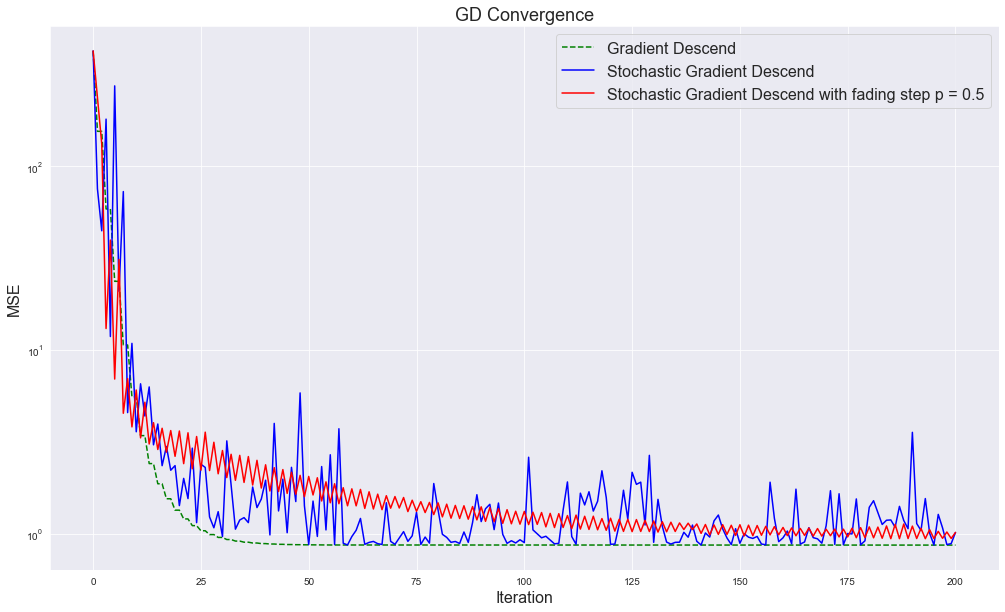

In [1202]:
# -- YOUR CODE HERE --
n = 200
lr = 0.01
batch_size = 10
p = 0.5
mse_calc = np.vectorize(MSELoss.calc_loss)
w_gd = gradient_descent(w_init, X, y, loss, lr, n)
w_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, n)
w_sgd_fade = stochastic_gradient_descent_fading(w_init, X, y, loss, lr, batch_size, p, n)

loss = MSELoss()
gd_losses = np.array([loss.calc_loss(X, y, w) for w in w_gd])
sgd_losses = np.array([loss.calc_loss(X, y, w) for w in w_sgd])
sgdf_losses = np.array([loss.calc_loss(X, y, w) for w in w_sgd_fade])

fig, ax = plt.subplots(figsize=(17, 10))
iterations = np.arange(0, n+1)
plt.plot(iterations, gd_losses, 'g--', label="Gradient Descend")
plt.plot(iterations, sgd_losses, 'b-', label="Stochastic Gradient Descend")
plt.plot(iterations, sgdf_losses, 'r-', label=f"Stochastic Gradient Descend with fading step p = {p}")

plt.yscale('log')

plt.grid(visible=True)
plt.title("GD Convergence", fontsize=18)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.legend(fontsize=16)

plt.show()

#### Выводы
* Обычный градиентный спуск быстро (уже к 50 итерации) достигает минимума;
* Стохастическому градиентному спуску со статическим размером шага требуется около 50 итераций, чтобы достичь окрестности минимума, однако он не сходится к минимуму, а колеблется около него;
* Стохастическому градиентному спуску со затухающим размером шага для достижения минимума требуется больше итераций (>=200), чем обычному градиентному спуску;
* Главное преимущество SGD - более быстрое выполнение одной итерации, что в конечном итоге сокращает время выполнения градиентного спуска (несмотря на то, что SGD требуется больше итераций, каждая итерация выполняется на порядок быстрее, чем в классическом градиентном спуске).
* Однако на данном графике нам не видно преимущество стохастического градиентного спуска, так как мы выводим зависимость MSE только от количества итераций и не видим, сколько времени тратится на одну итерацию.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [1214]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        w_init = np.random.rand(X.shape[1])
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr)[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        res = np.matmul(X, self.w)
        return res



Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [1215]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [1216]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [1217]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [1218]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

Добавим класс для предобработки данных:
* Заполняет пропуски в категориальных признаках пустыми строками, пропуски в числовых признаках медианным значением на тренировочной выборке;
* Нормализует числовые признаки c помощью StandardScaler;
* Кодирует категориальные признаки с помощью OneHotEncoder (опуская первые колонки во избежание линейной зависимости).

In [1219]:
class Preprocessor:
    def __init__(self, cat_nan_replacer: str = "") -> None:
        self.scaler = StandardScaler()
        self.nan_filler = SimpleImputer(strategy="median")
        self.ohe = OneHotEncoder(drop="first", handle_unknown = "ignore")
        self.cat_nan_replacer = cat_nan_replacer
        self.trained = False

    def fit_transform(self, X: pd.DataFrame) -> pd.DataFrame:

        cat_features_mask = (X.dtypes == "object").values
        # выделяем числовые признаки
        X_numeric = X[X.columns[~cat_features_mask]]
        # обучаем SimpleImputer
        self.nan_filler.fit(X_numeric)
        # заполняем пропуски в числовых признаках на тренировочной выборке медианными значениями
        X_num_no_nan = pd.DataFrame(data=self.nan_filler.transform(X_numeric), columns=X_numeric.columns)
        # обучаем StandardScaler
        self.scaler.fit(X_num_no_nan)
        # нормализуем числовые данные тренировочной выборки
        X_num_scaled = pd.DataFrame(data=self.scaler.transform(X_num_no_nan), columns=X_num_no_nan.columns)

        # заполняем пропуски в категориальных признаках на тренировочной выборке пустыми строками
        X_cat = X[X.columns[cat_features_mask]].fillna(self.cat_nan_replacer)
        # обучаем OneHotEncoder
        self.ohe.fit(X_cat)
        # кодируем категориальные признаки
        X_cat_ohe = pd.DataFrame(data=self.ohe.transform(X_cat).toarray(),  columns=self.ohe.get_feature_names_out())

        X_prep = pd.concat([X_num_scaled, X_cat_ohe], axis=1)
        self.trained = True

        return X_prep

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        assert self.trained, "Preprocessor must be fitted first"

        cat_features_mask = (X.dtypes == "object").values
        X_numeric = X[X.columns[~cat_features_mask]]
        # заполняем пропуски в числовых признаках на тренировочной выборке медианными значениями
        X_num_no_nan = pd.DataFrame(data=self.nan_filler.transform(X_numeric), columns=X_numeric.columns)
        # нормализуем числовые данные тренировочной выборки
        X_num_scaled = pd.DataFrame(data=self.scaler.transform(X_num_no_nan))

        # заполняем пропуски в категориальных признаках на тренировочной выборке пустыми строками
        X_cat = X[X.columns[cat_features_mask]].fillna(self.cat_nan_replacer)
        # кодируем категориальные признаки
        X_cat_ohe = pd.DataFrame(data=self.ohe.transform(X_cat).toarray(), columns=self.ohe.get_feature_names_out())

        X_prep = pd.concat([X_num_scaled, X_cat_ohe], axis=1)
        self.trained = True

        return X_prep

Удалим из таблицы колонку с индексом и проверим наличие пропусков в данных.

In [1220]:
# -- YOUR CODE HERE --
X_raw = X_raw.drop('index', axis=1)

In [1221]:
X_raw.isna().sum()

0      0
1     37
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
dtype: int64

Разделим выборку на тренировочную и тестовую.

In [1222]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.25, random_state=13)

Обработаем выборку с помощью добавленного класса.

In [1223]:
preproc = Preprocessor()
X_train = preproc.fit_transform(X_train)
X_test = preproc.transform(X_test)

Проверим корректность работы предобработчика.

In [1224]:
X_train.isna().sum()

0          0
1          0
9          0
10         0
11         0
          ..
x9_idi     0
x9_mfi     0
x9_mpfi    0
x9_spdi    0
x9_spfi    0
Length: 65, dtype: int64

In [1225]:
X_test.isna().sum()

0          0
1          0
2          0
3          0
4          0
          ..
x9_idi     0
x9_mfi     0
x9_mpfi    0
x9_spdi    0
x9_spfi    0
Length: 65, dtype: int64

In [1226]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,x8_three,x8_twelve,x8_two,x9_2bbl,x9_4bbl,x9_idi,x9_mfi,x9_mpfi,x9_spdi,x9_spfi
0,1.804883,2.440448,-1.280739,-0.211225,1.086273,-1.649400,1.133390,1.471592,0.499170,0.010411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.143948,0.289795,-0.709193,-0.665652,-0.956093,0.332192,-0.975807,-0.494115,-1.154706,0.647839,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.143948,0.941508,-0.852079,-1.338879,-0.956093,-1.277852,-1.075864,-0.821733,-1.229883,-0.117074,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.686520,-0.557432,-0.262673,-0.101825,-0.159072,0.249626,-0.239389,-0.368108,1.213344,-1.997486,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.686520,1.365121,1.702016,1.135228,1.285528,0.951439,1.251457,0.287128,1.175756,-0.180817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,-2.347455,-0.524846,1.041166,1.311950,0.737576,1.034006,0.815209,0.463537,1.814753,-0.372045,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,-1.516987,-0.850703,2.059232,1.488671,2.281804,2.066085,2.492161,1.521995,1.062991,1.189653,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,-0.686520,-0.166404,2.809386,2.161898,1.335342,2.066085,1.961860,0.740752,1.514049,0.807196,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.143948,-0.590017,-0.852079,-1.953197,-0.856465,-0.452188,-1.097876,-0.771330,-1.455411,0.456611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-1.516987,-0.785531,1.898485,1.311950,1.584411,0.745024,0.895255,0.463537,1.814753,-0.372045,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1227]:
X_train

,0,1,9,10,11,12,13,16,18,19,...,x8_three,x8_twelve,x8_two,x9_2bbl,x9_4bbl,x9_idi,x9_mfi,x9_mpfi,x9_spdi,x9_spfi
0,0.974415,-0.492261,0.112404,1.126812,0.388880,0.992723,0.380963,-0.040490,0.912639,-0.627016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.974415,-1.176559,-0.852079,-1.372540,-1.155348,0.001927,-0.909769,-0.645323,1.213344,-2.889885,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.143948,-0.198990,-0.959244,-0.539422,-0.756838,0.167059,-1.109883,-0.796532,-0.816414,-0.372045,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.143948,-0.687774,-0.709193,-1.456693,-1.055720,-0.699887,-1.261969,-0.821733,-1.004354,-0.499531,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.686520,-0.427089,-0.226951,0.015989,-0.258700,0.414758,-0.361458,-0.065692,0.123289,0.647839,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.686520,0.289795,0.344594,0.714461,0.388880,0.579891,1.181417,1.471592,0.499170,0.010411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
146,-0.686520,-0.166404,2.059232,2.002006,2.580687,1.075289,2.001882,2.177231,1.213344,0.392868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
147,0.974415,1.365121,-0.852079,-1.338879,-0.657210,-1.195285,-1.121890,-0.771330,-1.229883,-0.117074,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
148,-1.516987,-0.948460,1.076888,1.227796,0.388880,0.167059,1.253458,1.219579,-0.102240,0.265382,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [1228]:
# -- YOUR CODE HERE --
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [1229]:
from sklearn.metrics import mean_squared_error as mse

# -- YOUR CODE HERE --
print(f"{'Linear Regression MSE on Train:':40} {mse(y_train, linear_regression.predict(X_train)):.6f}")
print(f"{'Linear Regression MSE on Test:':40} {mse(y_test, linear_regression.predict(X_test)):.6f}")

Linear Regression MSE on Train:          1315834.019702
Linear Regression MSE on Test:           9921689.383939


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [1234]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return (np.linalg.norm(np.matmul(X, w) - y) ** 2) / X.shape[0] + self.coef * np.linalg.norm(w[:-1]) ** 2


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return np.matmul(X.T, (np.matmul(X, w) - y)) * 2 / X.shape[0] + 2 * self.coef * np.hstack([w[:-1], 0])

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [1235]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [1236]:
# -- YOUR CODE HERE --
linear_regression.fit(X_train, y_train)

In [1241]:
print(f"Ridge Regression (L2 regularization with coef = {0.1})")
print(f"{'Ridge Regression MSE on Train:':40} {mse(y_train, linear_regression.predict(X_train)):.6f}")
print(f"{'Ridge Regression MSE on Test:':40} {mse(y_test, linear_regression.predict(X_test)):.6f}")

Ridge Regression (L2 regularization with coef = 0.1)
Ridge Regression MSE on Train:           4896957.154351
Ridge Regression MSE on Test:            14857440.705490


Проведем ряд испытаний с экспоненциально возрастающими значениями coef, чтобы найти наиболее удачное значение.

In [1242]:
min_mse_on_test = mse(y_test, linear_regression.predict(X_test))
best_model = linear_regression
best_coef = 0.1
for coef in map(lambda x: 10**x, range(-4, 0)):
    cur_model = LinearRegression(MSEL2Loss(coef))
    cur_model.fit(X_train, y_train)
    cur_mse = mse(y_test, cur_model.predict(X_test))
    if  cur_mse < min_mse_on_test:
        min_mse_on_test = cur_mse
        best_coef = coef
        best_model = cur_model

In [1243]:
print(best_coef)

0.001


In [1263]:
print(f"The smallest MSE on test may be achieved with coefficient = {best_coef}")
print(f"{'Ridge Regression MSE on Train:':40} {mse(y_train, best_model.predict(X_train)):.6f}")
print(f"{'Ridge Regression MSE on Test:':40} {mse(y_test, best_model.predict(X_test)):.6f}")

The smallest MSE on test may be achieved with coefficient = 0.001
Ridge Regression MSE on Train:           1501930.398371
Ridge Regression MSE on Test:            6506737.697757


#### Результаты
* Linear Regression MSE on Train:          1315834.019702
* Linear Regression MSE on Test:           9921689.383939

* Ridge Regression MSE on Train:           1501930.398371
* Ridge Regression MSE on Test:            6506737.697757

MSE на тренировочной выборке увеличилась примерно на 200 тысяч, при этом MSE на тестовой выборке уменьшилась примерно на 3.5 млн.

#### Выводы
* Плохой (слишком большой) коэффициент регуляризации 0.1 привел к недообучению (ошибка увеличилась как на тренировочной, так и на тестовой выборке);
* Регуляризация с коэффициентом 0.01 позволила уменьшить ошибку на тестовой выборке, снизив переобучение модели (при этом ошибка на тренировочной выборке увеличилась незначительно).

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [1245]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def __fi(self, z: float) -> float:
        if abs(z) < self.eps:
            return (z**2) / 2
        return self.eps * (abs(z) - self.eps / 2)

    def __grad_fi(self, z: float) -> float:
        if abs(z) < self.eps:
            return z
        if z >= 0:
            return self.eps
        return -self.eps


    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        fi = np.vectorize(self.__fi)
        return fi(np.matmul(X, w) - y).sum() / X.shape[0]



    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

        grad_fi = np.vectorize(self.__grad_fi)
        return np.matmul(X.T, grad_fi(np.matmul(X, w) - y)) / X.shape[0]

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [1257]:
# -- YOUR CODE HERE --
linear_regression = LinearRegression(HuberLoss(0.1))

In [1258]:
linear_regression.fit(X_train, y_train)

In [1259]:
print(f"Linear Regression with Huber Loss (eps = 0.1)")
print(f"{'Linear Regression MSE on Train:':40} {mse(y_train, linear_regression.predict(X_train)):.6f}")
print(f"{'Linear Regression MSE on Test:':40} {mse(y_test, linear_regression.predict(X_test)):.6f}")

Linear Regression with Huber Loss (eps = 0.1)
Linear Regression MSE on Train:          154343266.552044
Linear Regression MSE on Test:           268230627.282756


Значения MSE на обеих выборках возросли на порядок.

Сравним значения R^2^ на обычной линейной регрессии c MSE и регрессии с HuberLoss:

In [1269]:
from sklearn.metrics import r2_score

In [1270]:
lr_classic = LinearRegression(MSELoss())
lr_classic.fit(X_train, y_train)

In [1271]:
lr_huber = linear_regression

In [1272]:
print(f"MSE Linear Regression R\u00b2 on Train: {r2_score(y_train, lr_classic.predict(X_train)):.6f}")
print(f"MSE Linear Regression R\u00b2 on Test: {r2_score(y_test, lr_classic.predict(X_test)):.6f}")

MSE Linear Regression R² on Train: 0.974620
MSE Linear Regression R² on Test: 0.886769


In [1273]:
print(f"HuberLoss Linear Regression R\u00b2 on Train: {r2_score(y_train, lr_huber.predict(X_train)):.6f}")
print(f"HuberLoss Linear Regression R\u00b2 on Test: {r2_score(y_test, lr_huber.predict(X_test)):.6f}")

HuberLoss Linear Regression R² on Train: -1.976937
HuberLoss Linear Regression R² on Test: -2.061177


По R^2^ score также видно, что обычная линейная регрессия на MSE работает намного лучше, чем регрессия на HuberLoss (тут вообще R^2^ меньше нуля это очень плохо).

Попробуем подобрать eps оптимальный с точки зрения ошибки на тесте.

In [1274]:
results = {}
min_mse_on_test = mse(y_test, linear_regression.predict(X_test))
best_eps = 0.1
best_model = linear_regression
for eps in map(lambda x: 10**x, range(1, 7)):
    cur_model = LinearRegression(HuberLoss(eps))
    cur_model.fit(X_train, y_train)
    train_mse = mse(y_train, cur_model.predict(X_train))
    test_mse = mse(y_test, cur_model.predict(X_test))
    print(f"Huber Loss (eps = {eps}): MSE on Train = {train_mse:.3f}, MSE on Test = {test_mse:.3f}")
    if  test_mse < min_mse_on_test:
        min_mse_on_test = test_mse
        best_eps = eps
        best_model = cur_model

Huber Loss (eps = 10): MSE on Train = 5942241.375, MSE on Test = 19937907.089
Huber Loss (eps = 100): MSE on Train = 3406876.684, MSE on Test = 12628816.719
Huber Loss (eps = 1000): MSE on Train = 1665878.521, MSE on Test = 9798255.796
Huber Loss (eps = 10000): MSE on Train = 1344561.140, MSE on Test = 8818598.830
Huber Loss (eps = 100000): MSE on Train = 1344539.176, MSE on Test = 8819255.695
Huber Loss (eps = 1000000): MSE on Train = 1344539.645, MSE on Test = 8819186.745


In [1275]:
print(f"The smallest MSE on test may be achieved with eps = {best_eps}")
print(f"The smallest MSE on test = {min_mse_on_test}")

The smallest MSE on test may be achieved with eps = 10000
The smallest MSE on test = 8818598.829953797


* Заметим, что чем больше эпсилон, тем больше HuberLoss похож на MSE, поэтому минимальное значение MSE на тренировочной выборке достигается при наибольшем значении eps.
* Ошибка на тестовой выборке убывает при увеличении эпсилон до 10000, а затем медленно начинает возрастать.

In [1276]:
print(f"HuberLoss Linear Regression R\u00b2 on Train: {r2_score(y_train, best_model.predict(X_train)):.6f}")
print(f"HuberLoss Linear Regression R\u00b2 on Test: {r2_score(y_test, best_model.predict(X_test)):.6f}")

HuberLoss Linear Regression R² on Train: 0.974066
HuberLoss Linear Regression R² on Test: 0.899358


Нам удалось незначительно увеличить качество модели на тесте! (по сравнению с линейной регрессией на MSE)

**Судя по результатам, выбросы несильно влияли на обучение.**

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

### MEME
[MEME](https://static13.tgcnt.ru/posts/_0/88/88ef8ba36d76e46050a6f8ee7adf6f4a.jpg)

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [1253]:
# -- YOUR CODE HERE --
def burning_imitation(
        w_init: np.ndarray,
        X: np.ndarray,
        y: np.ndarray,
        loss: BaseLoss,
        t_min: float = 0.001,
        p: float = 3,
) -> List[np.ndarray]:
    """
    Функция алгоритма метода отжига
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param t_min: float -- минимальная температура
    :param p: float -- параметр распределения
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    t = 100
    wt = [w_init]
    old_w = w_init
    old_loss = loss.calc_loss(X, y, old_w)
    while t > t_min:
        new_w = old_w + np.random.standard_t(p, size=old_w.shape)
        new_loss = loss.calc_loss(X, y, new_w)
        delta = new_loss - old_loss
        if delta <= 0:
            wt.append(new_w)
            old_w = new_w
            old_loss = new_loss
        elif np.random.rand(1) < math.exp(-delta / t):
            wt.append(new_w)
            old_w = new_w
            old_loss = new_loss
        t *= 0.99
    return wt

In [1254]:
 #Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


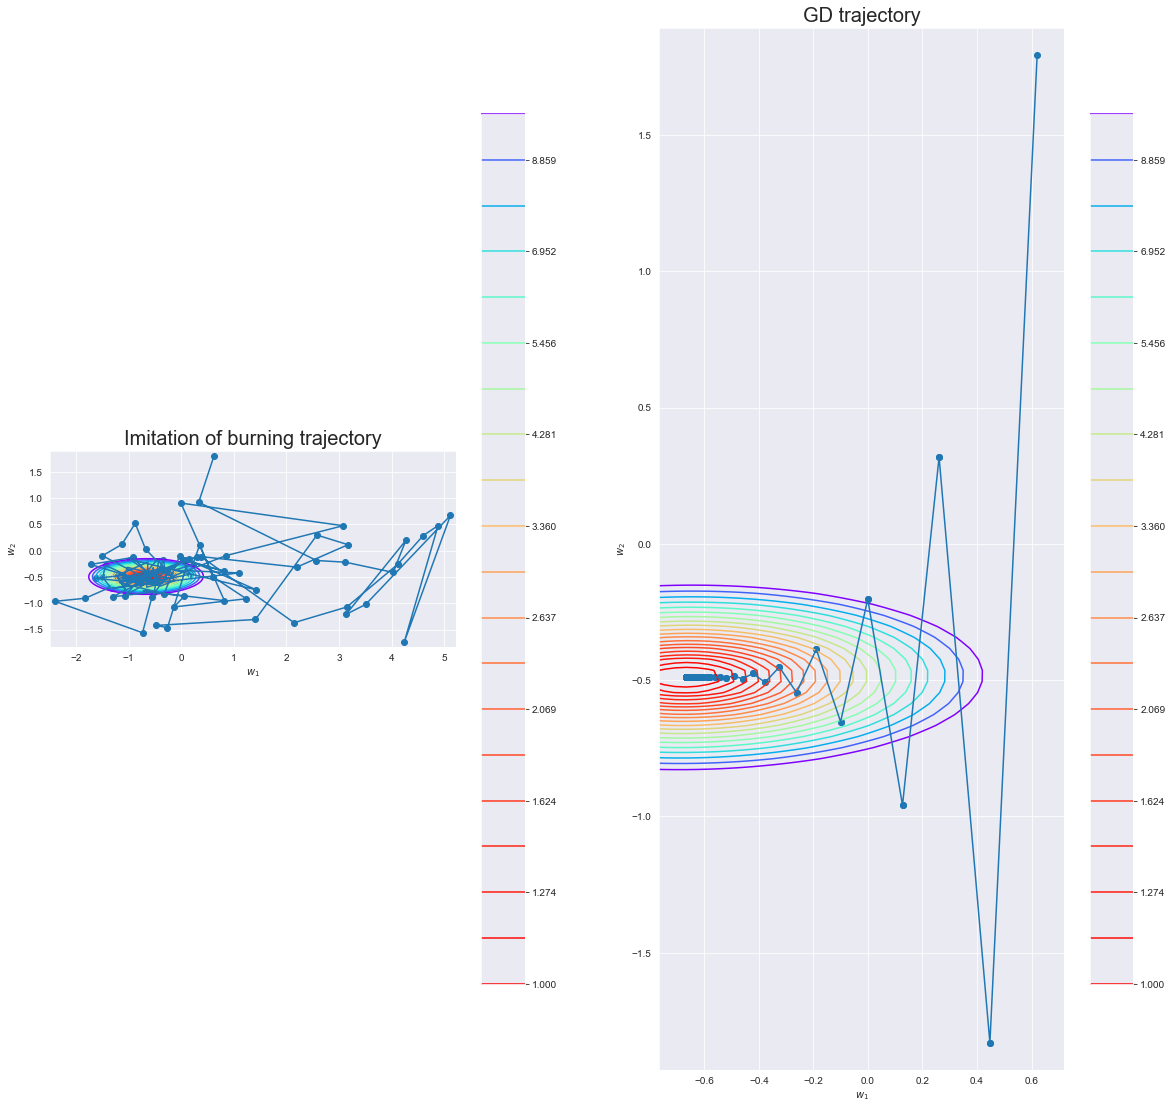

In [1255]:
loss = MSELoss()
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(1, 2)
w_burn = burning_imitation(w_init, X, y, loss)
ax1 = plt.subplot(gs[0, 0])
plot_gd(w_burn, X, y, loss)
plt.title(f"Imitation of burning trajectory", fontsize=20)

ax2 = plt.subplot(gs[0, 1])
w_gd = gradient_descent(w_init, X, y, loss, 0.01, 500)
plot_gd(w_gd, X, y, loss)
plt.title(f"GD trajectory", fontsize=20)
plt.show()

Сравним конечные ошибки после выполнения двух алгоритмов.

In [1256]:
print(f"{'Burning imitation final MSE:':40} {loss.calc_loss(X, y, w_burn[-1]):.6f}")
print(f"{'Gradient descend final MSE:':40} {loss.calc_loss(X, y, w_gd[-1]):.6f}")

Burning imitation final MSE:             0.877131
Gradient descend final MSE:              0.867064


Ошибки почти одинаковые, но алгоритм имитации отжига не достиг минимума ошибки.

При этом количество итераций алгоритмов примерно одинаковое (но по времени одна итерация алгоритма имитации отжига происходит намного быстрее).

In [1088]:
print(f"{'Burning imitation iteration count:':40} {math.ceil(math.log(0.01, 0.99))}")
print(f"{'Gradient descend iteration count:':40} {len(w_gd)}")

Burning imitation iteration count:       459
Gradient descend iteration count:        501


Напишем класс линейной регрессии, работающий на алгоритме имитации отжига.

In [1172]:
class BurningLinearRegression:
    def __init__(self, loss: BaseLoss, t_min: float = 0.001, p: float = 3) -> None:
        self.loss = loss
        self.t_min = t_min
        self.p = p

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        w_init = np.random.rand(X.shape[1])
        self.w = burning_imitation(w_init, X, y, self.loss, self.t_min, self.p)[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        res = np.matmul(X, self.w)
        return res

Обучим нашу модель линейной регрессии на алгоритме имитации отжига и ошибке MSE.

*Проведя ряд экспериментов со значением параметра количества степеней свободы в распределении Стьюдента, я установил, что наименьшая ошибка на тестовой выборке получается примерно при p = 0.7.*

In [1251]:
blr = BurningLinearRegression(loss, 0.00001, 0.7)
blr.fit(X_train, y_train)

In [1252]:
print(f"{'Linear Regression MSE on Train:':40} {mse(y_train, blr.predict(X_train)):.6f}")
print(f"{'Linear Regression MSE on Test:':40} {mse(y_test, blr.predict(X_test)):.6f}")

Linear Regression MSE on Train:          3651046.742181
Linear Regression MSE on Test:           7938421.441794


#### Выводы
* Алгоритм имитации отжига работает менее предсказуемо, чем градиентный спуск (это хорошо заметно по его хаотичной траектории спуска);
* На очередном шаге траектория выполнения алгоритма имитации отжига с определенной вероятностью удаляться от точки минимума (на первых итерациях таких шагов делается особенно много, затем алгоритм более направленно приближается к минимуму;
* Одна итерация алгоритма имитации отжига, судя по скорости обучения модели, занимает меньше времени, чем итерация градиентного спуска;
* Однако алгоритм не гарантирует достижения минимума (при экспериментах я обнаружил, что при одинаковых исходных установках конечная ошибка может отличаться в 2 раза (от 7 млн до 15 млн на тестовой выборке);
* Но при выбранном мной параметре распределения удалось достичь при алгоритме имитации отжига ошибки на тесте на 1 млн меньше, чем на обычной линейной регрессии (при этом ошибка на тренировочной выборке на 2 млн больше). Для сравнения:

Classic Linear Regression MSE on Train:          1315834.019702
Classic Linear Regression MSE on Test:           9921689.383939

Burning Linear Regression MSE on Train:          3651046.742181
Burning Linear Regression MSE on Test:           7938421.441794

In [1]:
import matplotlib as m




In [ ]:
from m import plotting


In [3]:
print(list(filter(lambda x: x % 2 == 0, [1, 2, 4, 7, 77, 3])))

[2, 4]


In [4]:
data = {'elefant': 100, 'tiger': 30, 'cat': 1}
def add_weight(animal, weight):
    data[animal] = weight
    return data

In [5]:
class Car:
    name = 'VAZ'
    model = '2107'

car = Car()
car.name = 'UAZ'
new_car = car
new_car = 'KAMAZ'
car = Car()
print(car. name)

VAZ


In [7]:
class Animal:
    def says (self) :
        print('Gh gh')
class Mammal (Animal):
    def says (self):
        print ('Hrrrrr')
class Cat (Mammal):
    def says (self) :
        print ('Мяу')
a = Animal ()
b = Mammal ()
c = Cat ()
b.says ()

Hrrrrr
